In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from pandas.tseries.offsets import DateOffset
import time

In [58]:
data = pd.read_csv("full_grouped.csv")
data.rename(columns={'New cases':'New_cases'},inplace=True)
data.rename(columns={'New deaths':'New_deaths'},inplace=True)
data.rename(columns={'New recovered':'New_recovered'},inplace=True)

data_df = pd.DataFrame()
data_df['Date'] = data.loc[data['Country/Region']=='Madagascar'].Date
data_df['Confirmé'] = data.loc[data['Country/Region']=='Madagascar'].New_cases
data_df['mor'] = data.loc[data['Country/Region']=='Madagascar'].Deaths
data_df.Date = pd.to_datetime(data_df.Date)
data_df = data_df.set_index('Date')
data_df = data_df[58:]

data_df['day_count'] = list(range(1,len(data_df)+1))
ydata = [i for i in data_df.Confirmé]
xdata = data_df.day_count
y = np.array(ydata, dtype=float)
x = np.array(xdata, dtype=float)

In [59]:
data_df

,Confirmé,mor,day_count
Date,,,
2020-03-20,3,0,1
2020-03-21,0,0,2
2020-03-22,0,0,3
2020-03-23,9,0,4
2020-03-24,5,0,5
...,...,...,...
2020-06-18,25,13,91
2020-06-19,40,13,92
2020-06-20,60,13,93


In [60]:
add_dates = [data_df.index[-1] + DateOffset(day=x)for x in range(22,33)]
future_dates = pd.DataFrame(index=add_dates[1:])
future_dates['day_count'] = np.linspace(x[-1],107,10)
future_dates.index

DatetimeIndex(['2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26',
               '2020-06-27', '2020-06-28', '2020-06-29', '2020-06-30',
               '2020-06-30', '2020-06-30'],
              dtype='datetime64[ns]', freq=None)

In [61]:
x_poly = x[:,np.newaxis]
print(x_poly.shape)
x_pred = np.linspace(x[-1],107,10)
x_pred = x_pred[:,np.newaxis]
print(x_pred)

(95, 1)
[[ 95.        ]
 [ 96.33333333]
 [ 97.66666667]
 [ 99.        ]
 [100.33333333]
 [101.66666667]
 [103.        ]
 [104.33333333]
 [105.66666667]
 [107.        ]]


In [63]:
poly_reg = PolynomialFeatures(degree=6)
X_poly = poly_reg.fit_transform(x_poly)
X_pred = poly_reg.fit_transform(x_pred)
model = LinearRegression()
model.fit(X_poly, y)
model.score(X_poly,y)

0.6955217636628981

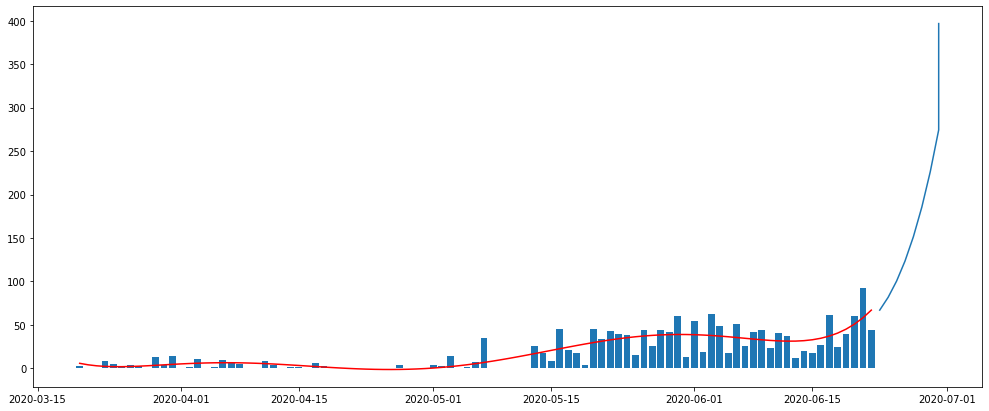

In [64]:
plt.figure(figsize=(17,7))
plt.bar(data_df.index,y)
plt.plot(data_df.index,model.predict(X_poly),color='red')
plt.plot(future_dates.index,model.predict(X_pred))